## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


### Load data

In [2]:
# Load the data file into a DataFrame
vehicle_price = pd.read_csv("/datasets/vehicles_us.csv")
print(vehicle_price.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


### Explore initial data

In [3]:
# print the general/summary information about the DataFrame
print(vehicle_price.describe(include="all"))
print(vehicle_price.info())

                price    model_year       model  condition     cylinders  \
count    51525.000000  47906.000000       51525      51525  46265.000000   
unique            NaN           NaN         100          6           NaN   
top               NaN           NaN  ford f-150  excellent           NaN   
freq              NaN           NaN        2796      24773           NaN   
mean     12132.464920   2009.750470         NaN        NaN      6.125235   
std      10040.803015      6.282065         NaN        NaN      1.660360   
min          1.000000   1908.000000         NaN        NaN      3.000000   
25%       5000.000000   2006.000000         NaN        NaN      4.000000   
50%       9000.000000   2011.000000         NaN        NaN      6.000000   
75%      16839.000000   2014.000000         NaN        NaN      8.000000   
max     375000.000000   2019.000000         NaN        NaN     12.000000   

         fuel       odometer transmission   type paint_color   is_4wd  \
count   51525 

In [4]:
# print a sample of data
print(vehicle_price.head(10))


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

**Based on the sample of data and general information, it appears that there are both categorical and numerical data here. Some of these columns seem to vary greatly, as I notice for instance, the standard deviation for "days_listed" is very high at 28


**At first glance, it looks like the column "date_posted" has a dtype of "object", which should be converted to datetime. 
**It also seems like the columns "cylinders", "model_year" and "is_4wd" are float64, when I think it might be better to convert them to int64 

**Five columns seem to have several missing values:   model_year,  cylinders, odometer, paint_color, is_4wd.
**The column with the largest missing values, where nearly 50% of the data is missing. (49.63% of data missing in this column)

### Conclusions and further steps

**I will go through each column that contains missing values and look through the values to check if there are any values that I can fill in immediately vs values in columns that I will need to do further analysis on.

In [5]:
print(vehicle_price[vehicle_price["is_4wd"]== 1].count())
print(vehicle_price[vehicle_price["is_4wd"]== 0].count())

price           25572
model_year      23764
model           25572
condition       25572
cylinders       22993
fuel            25572
odometer        21696
transmission    25572
type            25572
paint_color     20942
is_4wd          25572
date_posted     25572
days_listed     25572
dtype: int64
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


**Here, I have found that all 25572 rows in vehicle["is_4wd"] have  a Boolean value of 1, indicating (True) for 4-wheel drive. As mentioned before, about half of the data is missing and since 100% of the available data in this column indicate "True", I think it is reasonable to assume that the other half of the data which is missing should have been recorded as "0" (False), but that it is likely that this information got lost in translation. I make this assumption due to the large amount of missing data coupled with the fact that all of the present values in this column are recorded as "1" (True)) 

## Treat missing values (if any)

In [6]:
print(vehicle_price.duplicated().sum())
vehicle_price["is_4wd"] = vehicle_price["is_4wd"].fillna("0")
print(vehicle_price["is_4wd"].value_counts())
print()
print()
print(vehicle_price["model_year"].isna().sum())
print(vehicle_price["model_year"].isna().sum()/len(vehicle_price))
vehicle_price.dropna(subset=["model_year"],inplace=True)
print(vehicle_price["model_year"].isna().sum())

#print()
#print()
print(vehicle_price["cylinders"].isna().sum())
print(vehicle_price["cylinders"].isna().sum()/len(vehicle_price))
#print(vehicle_price.pivot_table(index=["cylinders"], values=["model_year"], aggfunc="mean", margins=True))
print(vehicle_price["cylinders"].value_counts().sort_values())
count = vehicle_price.loc[vehicle_price["cylinders"] != vehicle_price["cylinders"].isna() & (vehicle_price["fuel"]== "gas"),:] 
count.count()
vehicle_price["fuel"].value_counts()
vehicle_price.dropna(subset=["cylinders"], inplace=True)
print(vehicle_price["cylinders"].isna().sum())
print()
print(vehicle_price["paint_color"].isna().sum())
vehicle_price["paint_color"].value_counts()
print(vehicle_price["paint_color"].isna().sum()/len(vehicle_price))
vehicle_price.dropna(subset=["paint_color"], inplace=True)
print(vehicle_price["paint_color"].isna().sum())
print(vehicle_price["paint_color"].value_counts())
print()
print(vehicle_price["odometer"].isna().sum())
print(vehicle_price["odometer"].isna().sum()/len(vehicle_price))
odometer_mean = vehicle_price["odometer"].mean()
vehicle_price["odometer"].fillna(odometer_mean, inplace=True)
vehicle_price["odometer"].value_counts()
print(vehicle_price.info())

0
0      25953
1.0    25572
Name: is_4wd, dtype: int64


3619
0.07023774866569626
0
4897
0.10222101615664009
12.0        2
3.0        33
5.0       248
10.0      517
4.0     12856
6.0     14648
8.0     14705
Name: cylinders, dtype: int64
0

7716
0.17940431072566207
0
white     8409
black     6446
silver    5182
grey      4222
red       3720
blue      3716
green     1148
brown      996
custom     974
yellow     210
orange     186
purple      84
Name: paint_color, dtype: int64

5377
0.1523531578499986
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35293 entries, 2 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         35293 non-null  int64  
 1   model_year    35293 non-null  float64
 2   model         35293 non-null  object 
 3   condition     35293 non-null  object 
 4   cylinders     35293 non-null  float64
 5   fuel          35293 non-null  object 
 6   odometer      35293 non-null  float64



Note- Data contains no duplicates
1. All misssing values in vehicle_price["is_4wd"] were filled in with "0" to represent the "False" value for reasons above.
2. All missing values in vehicle_price["model_year"] were removed from the dataframe, as they only accounted for 7% of the entire data, which is not a significant amount. Missing values may have been due to print
3. Note that 4487/4897 of the missing values in vehicle_price["cylinders"] also have a value of "gas" in the vehicle["fuel"] column 
4. The missing data in vehicle_price["cylinders"] makes up about 10% of the entire data. This is also not a signficant amount, and the missing data in this column does not appear to have been influenced by any other column here. Thus, I justify removing the data rather than filling in.
5. The missing data in vehicle_price["paint_color"] makes up nearly 18% of the data. It would not make sense to fill these values in as this may risk being wrong about the data, so they will be removed as well.
6. The missing data in vehicle_price["odometer"] consists of about 15% of the entire dataframe which is a considerable amount. Since the distribution of values in this column did not seem to be impacted by extreme outliers, I chose to fill in the values with the mean of this column.
**It is important to note that after all missing values have been removed, 68% of the original dataset has been retained.

## Fix data types

In [7]:
vehicle_price["date_posted"] = pd.to_datetime(vehicle_price["date_posted"], format="%Y-%m-%d")
print(vehicle_price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35293 entries, 2 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         35293 non-null  int64         
 1   model_year    35293 non-null  float64       
 2   model         35293 non-null  object        
 3   condition     35293 non-null  object        
 4   cylinders     35293 non-null  float64       
 5   fuel          35293 non-null  object        
 6   odometer      35293 non-null  float64       
 7   transmission  35293 non-null  object        
 8   type          35293 non-null  object        
 9   paint_color   35293 non-null  object        
 10  is_4wd        35293 non-null  object        
 11  date_posted   35293 non-null  datetime64[ns]
 12  days_listed   35293 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 3.8+ MB
None


## Enrich data

In [8]:
# Add datetime values for when the ad was placed
vehicle_price["day_of_week_posted"] = vehicle_price["date_posted"].dt.dayofweek
print(vehicle_price["day_of_week_posted"])
vehicle_price['year_posted'] = pd.to_datetime(vehicle_price['date_posted']).dt.year
vehicle_price['month_posted'] = pd.to_datetime(vehicle_price['date_posted']).dt.month
print(vehicle_price["month_posted"])
print(vehicle_price["year_posted"])

2        3
4        1
5        2
6        3
7        0
        ..
51518    4
51520    2
51521    2
51522    3
51523    0
Name: day_of_week_posted, Length: 35293, dtype: int64
2         2
4         4
5         6
6        12
7         1
         ..
51518     8
51520    10
51521    11
51522    11
51523     7
Name: month_posted, Length: 35293, dtype: int64
2        2019
4        2019
5        2018
6        2018
7        2019
         ... 
51518    2018
51520    2018
51521    2018
51522    2018
51523    2018
Name: year_posted, Length: 35293, dtype: int64


In [9]:
# Add the vehicle's age when the ad was placed




vehicle_price["vehicle_age_in_years"] = vehicle_price["year_posted"] - vehicle_price["model_year"] 



#vehicle_price.loc[(vehicle_price["vehicle_age_in_years"]== 0) & (vehicle_price["odometer"] > float("0")), "vehicle_age_in_years"] = 1

vehicle_price["age_in_years"] = np.where((vehicle_price["vehicle_age_in_years"] == 0) & (vehicle_price["odometer"] > float("0")), 1, vehicle_price["vehicle_age_in_years"])



In [10]:
# Add the vehicle's average mileage per year

#avg_mileage_calc = vehicle_price.pivot_table(
    #index=['vehicle_age_in_years'], values=['odometer'], aggfunc=['mean'])
#avg_mileage_calc.columns =["mean_mileage"]
#print(avg_mileage_calc)
#vehicle_price["avg_mileage"] = avg_mileage_calc["mean_mileage"]
vehicle_price.head(20)
vehicle_price["avg_mileage"] = vehicle_price["odometer"] / vehicle_price["vehicle_age_in_years"]
print(vehicle_price.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   

  transmission   type paint_color is_4wd date_posted  days_listed  \
2    automatic  sedan         red      0  2019-02-07           79   
4    automatic  sedan       black      0  2019-04-02           28   
5    automatic  sedan       black    1.0  2018-06-20           15   
6    automatic  sedan       white      0  2018-12-27           73   
7    automatic    SUV       black    1.0  2019-01-07           68   

   day_of_week_posted  year_posted  month_posted  vehicle_age_in_years  \
2                   3         2019             2

In [11]:
# It might help to replace the condition values with something that can be manipulated more easily
def replace(row):
    value= row["condition"]
    if value == "new": 
        return 5
    elif value == "like new":
        return 4
    elif value == "excellent": 
        return 3
    elif value == "good": 
        return 2
    elif value == "fair":
        return 1
    elif value == "salvage": 
        return 0
vehicle_price["new_condition"] = vehicle_price.apply(replace, axis=1)



vehicle_price[["condition", "new_condition"]]

print(vehicle_price["condition"])
print(vehicle_price["new_condition"])
print(vehicle_price["condition"].value_counts())

2         like new
4        excellent
5        excellent
6        excellent
7        excellent
           ...    
51518    excellent
51520     like new
51521      salvage
51522    excellent
51523         good
Name: condition, Length: 35293, dtype: object
2        4
4        3
5        3
6        3
7        3
        ..
51518    3
51520    4
51521    0
51522    3
51523    2
Name: new_condition, Length: 35293, dtype: int64
excellent    16957
good         13808
like new      3251
fair          1095
new            104
salvage         78
Name: condition, dtype: int64


## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [12]:
# print the general/summary information about the DataFrame
vehicle_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35293 entries, 2 to 51523
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 35293 non-null  int64         
 1   model_year            35293 non-null  float64       
 2   model                 35293 non-null  object        
 3   condition             35293 non-null  object        
 4   cylinders             35293 non-null  float64       
 5   fuel                  35293 non-null  object        
 6   odometer              35293 non-null  float64       
 7   transmission          35293 non-null  object        
 8   type                  35293 non-null  object        
 9   paint_color           35293 non-null  object        
 10  is_4wd                35293 non-null  object        
 11  date_posted           35293 non-null  datetime64[ns]
 12  days_listed           35293 non-null  int64         
 13  day_of_week_post

In [13]:
# print a sample of data
print(vehicle_price.head(10))

    price  model_year                     model  condition  cylinders fuel  \
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent        4.0  gas   
13  16500      2018.0            hyundai sonata  excellent        4.0  gas   
14  12990      2009.0                 gmc yukon  excellent        8.0  gas   
15  17990      2013.0                  ram 1500  excellent        8.0  gas   

         odometer transmission    type paint_color is_4wd date_posted  \
2   110000.000000    automatic   sedan         red      0  2019-02-0

## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

<AxesSubplot:>

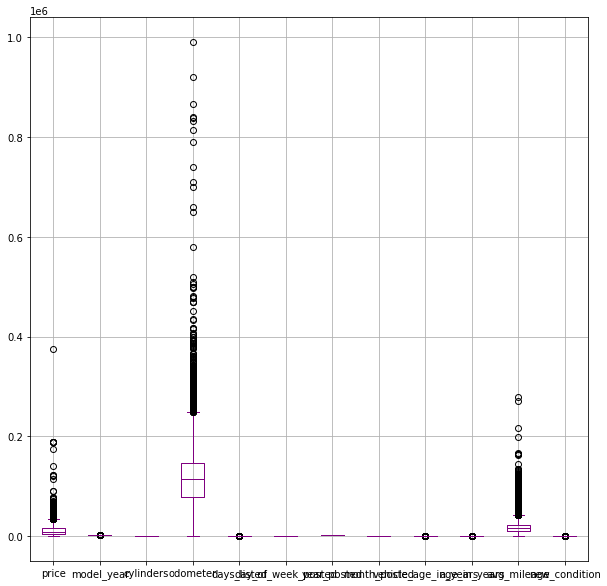

In [14]:
vehicle_price.boxplot(figsize=(10, 10), color="purple")

12170.271895276685
9000.0
Upper & Lower Bound: [-12850.0, 34750.0]


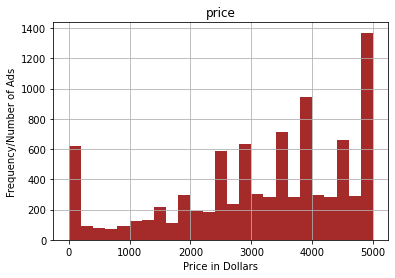

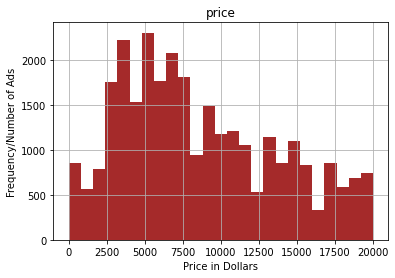

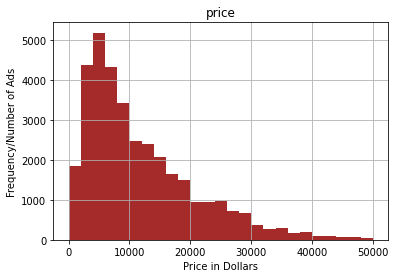

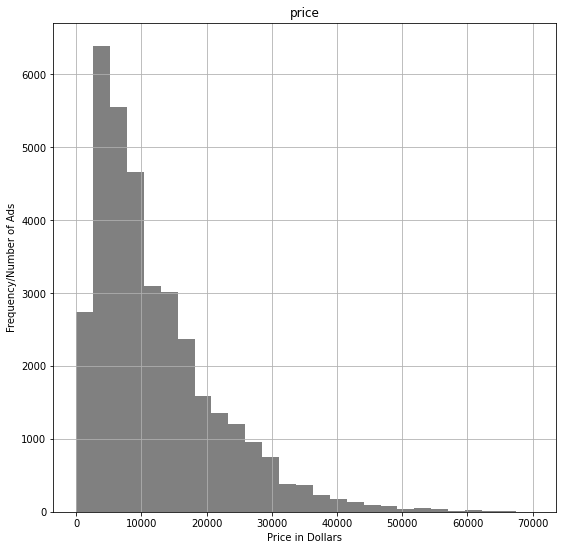

In [15]:
#Pr
vehicle_price.hist("price", bins=25, range=(0,5000), color="brown")
plt.xlabel("Price in Dollars")
plt.ylabel("Frequency/Number of Ads")
vehicle_price.hist("price", bins=25, range=(0,20000), color="brown")
plt.xlabel("Price in Dollars")
plt.ylabel("Frequency/Number of Ads")
vehicle_price.hist("price", bins=25, range=(0,50000), color="brown")
plt.xlabel("Price in Dollars")
plt.ylabel("Frequency/Number of Ads")
vehicle_price.hist("price", bins=27, range=(0, 70000), figsize=(9, 9), color="gray")
plt.xlabel("Price in Dollars")
plt.ylabel("Frequency/Number of Ads")
print(vehicle_price["price"].mean())
print(vehicle_price["price"].median())
Q1c = vehicle_price['price'].quantile(0.25)
Q3c = vehicle_price['price'].quantile(0.75)
iqr4 = Q3c-Q1c
print("Upper & Lower Bound:",[Q1c-(1.5 * iqr4), Q3c+(1.5 * iqr4)])

Above, the data in the vehicle["price"] column appears to be skewed to the left. Most vehicles seem to be priced on the lower end here. Just by a simple google search, cars sell for about $47000. Also, there seems about 2800 cars appear to be listed at a price of $0, which seems strange.

8.564559544385572
7.0
Upper & Lower Bound: [-8.0, 24.0]


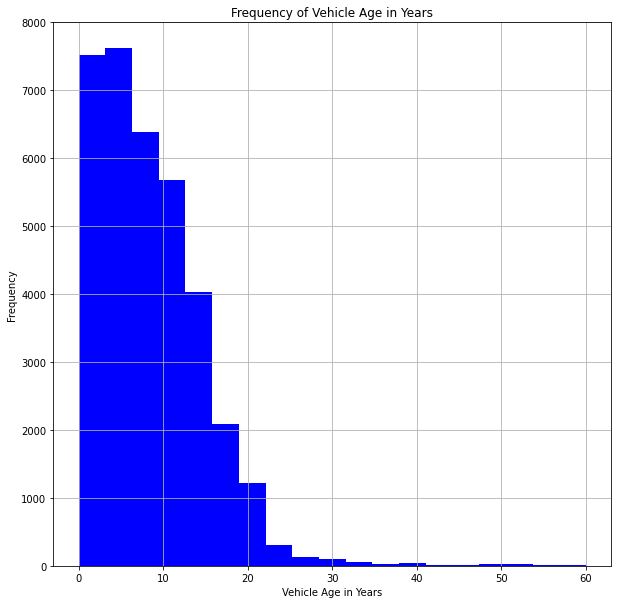

In [16]:
#Vehicle Age
vehicle_price.hist("vehicle_age_in_years", bins=19, range=(0, 60), figsize=(10, 10), color="blue")
plt.title("Frequency of Vehicle Age in Years")
plt.xlabel("Vehicle Age in Years")
plt.ylabel("Frequency")
print(vehicle_price["vehicle_age_in_years"].mean())
print(vehicle_price["vehicle_age_in_years"].median())
Q1b = vehicle_price['vehicle_age_in_years'].quantile(0.25)
Q3b = vehicle_price['vehicle_age_in_years'].quantile(0.75)
iqr3 = Q3b-Q1b
print("Upper & Lower Bound:",[Q1b-(1.5 * iqr3), Q3b+(1.5 * iqr3)])

Most of the vehicles are between 0-24 years old. Cars above 30 years old are rare.

58.0       1
71.0       1
89.0       1
59.0       1
60.0       1
        ... 
3.0     2318
6.0     2521
4.0     2542
5.0     2559
7.0     2595
Name: vehicle_age_in_years, Length: 65, dtype: int64
inf
15417.42857
Upper & Lower Bound: [-8353.843193749999, 41959.11007625]


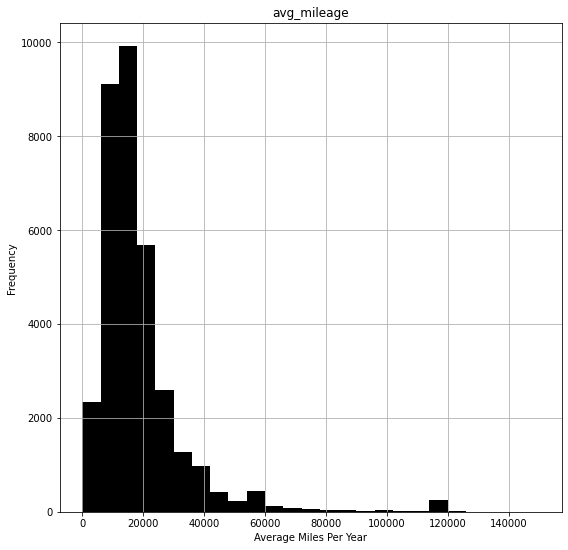

In [17]:
#Mileage


vehicle_price["odometer"].value_counts()
print(vehicle_price["vehicle_age_in_years"].value_counts().sort_values())
vehicle_price["avg_mileage"] = vehicle_price["avg_mileage"].round(5)


#vehicle_price[(vehicle_price["avg_mileage"] == float("0")) & (vehicle_price["odometer"] > float("0"))]


vehicle_price.hist("avg_mileage", bins=25, range=(0, 150000), figsize=(9,9), color="black")
plt.xlabel("Average Miles Per Year")
plt.ylabel("Frequency")
print(vehicle_price["avg_mileage"].mean())
print(vehicle_price["avg_mileage"].median())
Q1a = vehicle_price['avg_mileage'].quantile(0.25)
Q3a = vehicle_price['avg_mileage'].quantile(0.75)
iqr2 = Q3a-Q1a
print("Upper & Lower Bound:",[Q1a-(1.5 * iqr2), Q3a+(1.5 * iqr2)])


count    35293.000000
mean         6.126087
std          1.658585
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

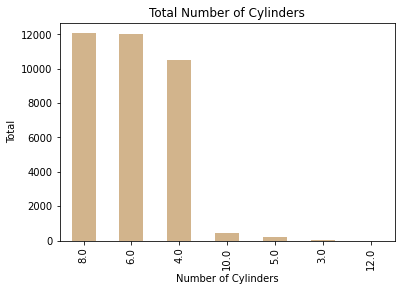

In [40]:
#Number of cylinders
vehicle_price["cylinders"].value_counts().plot(kind="bar", color="tan")
plt.xlabel("Number of Cylinders")
plt.ylabel("Total")
plt.title("Total Number of Cylinders")
vehicle_price["cylinders"].describe()

Upper & Lower Bound Interval: [-2.0, 14.0]


count    35293.000000
mean         6.126087
std          1.658585
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

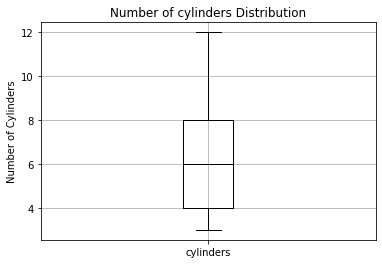

In [39]:
vehicle_price.boxplot("cylinders", color="black")
plt.ylabel("Number of Cylinders")
plt.title("Number of cylinders Distribution")
Q1 = vehicle_price['cylinders'].quantile(0.25)
Q3 = vehicle_price['cylinders'].quantile(0.75)
iqr = Q3-Q1
print("Upper & Lower Bound Interval:",[Q1-(1.5 * iqr), Q3+(1.5 * iqr)])
vehicle_price['cylinders'].describe()

* Most of the data in the ["cylinders"] column consists of 4, 6, and 8 cylinders.

Text(0, 0.5, 'Total Number of Ads')

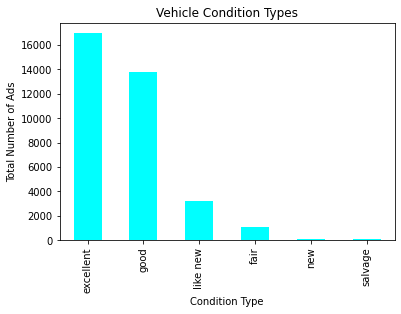

In [20]:
#Condition
vehicle_price["condition"].value_counts()
vehicle_price["condition"].value_counts().plot(kind="bar", color="aqua")
plt.title("Vehicle Condition Types")
plt.xlabel("Condition Type")
plt.ylabel("Total Number of Ads")


<AxesSubplot:ylabel='condition'>

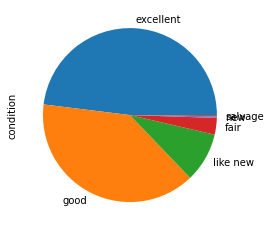

In [21]:
vehicle_price["condition"].value_counts().plot(kind="pie")

Upper & Lower Bound: [0.5, 4.5]
count    35293.000000
mean         2.638087
std          0.712859
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: new_condition, dtype: float64


3.0

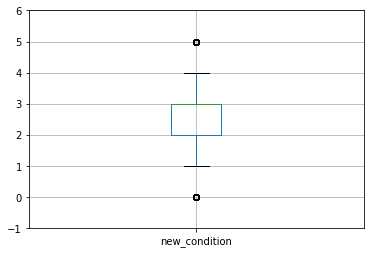

In [41]:
vehicle_price.boxplot("new_condition")
plt.ylim(-1, 6)
Q1d = vehicle_price['new_condition'].quantile(0.25)
Q3d = vehicle_price['new_condition'].quantile(0.75)
iqr5 = Q3d-Q1d
print("Upper & Lower Bound:",[Q1d-(1.5 * iqr5), Q3d+(1.5 * iqr5)])
print(vehicle_price["new_condition"].describe())
vehicle_price["new_condition"].median()


* Data in ["condition"] column is skewed to the right. Most cars in this dataset are either excellent, good or like new. Cars with worse conditions are seldom here.

## Study and treat outliers


* The following columns contain considerable outliers:
(1)["price"]
(2)["avg_mileage"]
(3) ["vehicle_age_in_years"]
(4) ["condiiton"]


In [23]:
# Determine the lower limits for outliers
#Condition:
price_lower = 0
avg_mileage_lower= 0
vehicle_age_lower= 0
condition_lower= 1


In [24]:
# Determine the upper limits for outliers
price_upper = 55000
avg_mileage_upper= 70000
vehicle_age_upper = 35
condition_upper = 4

In [25]:
# Store data without outliers in a separate DataFrame
data_filtered = vehicle_price.query('price < 40000 & avg_mileage < 45000 & vehicle_age_in_years < 35 & new_condition <= 4 & new_condition > 0')
print(data_filtered)


       price  model_year           model  condition  cylinders fuel  odometer  \
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5      14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6      12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7      15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
...      ...         ...             ...        ...        ...  ...       ...   
51517  11000      2012.0   dodge charger  excellent        8.0  gas   81000.0   
51518   3750      2005.0     ford taurus  excellent        6.0  gas  110200.0   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   

      transmission   type p

## Study core parameters without outliers

count    31627.000000
mean     10862.926961
std       7876.460224
min          1.000000
25%       4995.000000
50%       8500.000000
75%      14995.000000
max      39999.000000
Name: price, dtype: float64

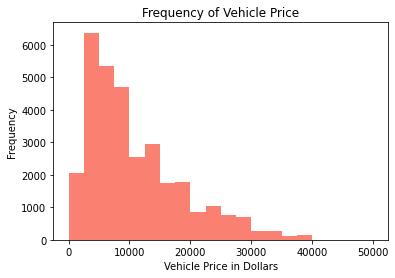

In [26]:
data_filtered["price"].plot(kind="hist", bins=20, range=(0,50000), color="salmon")
plt.title("Frequency of Vehicle Price")
plt.xlabel("Vehicle Price in Dollars")
data_filtered["price"].describe()

After removing the outliers, the data is not as skewed to the left as it was before.

Text(0.5, 0, 'Vehicle Age in Years')

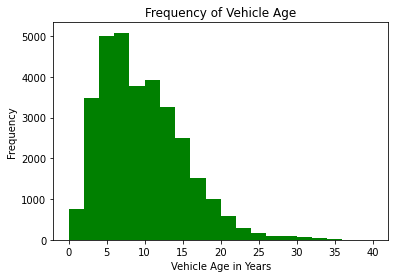

In [27]:
data_filtered["vehicle_age_in_years"].plot(kind="hist", bins=20, range=(0,40), color="green")
plt.title("Frequency of Vehicle Age")
plt.xlabel("Vehicle Age in Years")

The distribution of vehicle age in the filtered dataset looks less skewed than the unfiltered dataset.

count    31627.000000
mean     16094.754053
std       8496.787695
min          0.000000
25%      10272.727270
50%      14471.600000
75%      20203.666670
max      44999.000000
Name: avg_mileage, dtype: float64

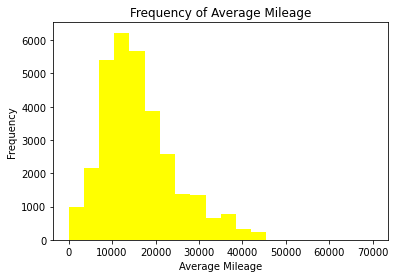

In [28]:
data_filtered["avg_mileage"].plot(kind="hist", bins=20, range=(0,70000), color="yellow")
plt.title("Frequency of Average Mileage")
plt.xlabel("Average Mileage")
data_filtered["avg_mileage"].describe()

The average mileage data here looks more normally distributed as compared to the unfiltered dataset. The extented tail on the right is much shorter.

Text(0, 0.5, 'Number of Vehicle Ads')

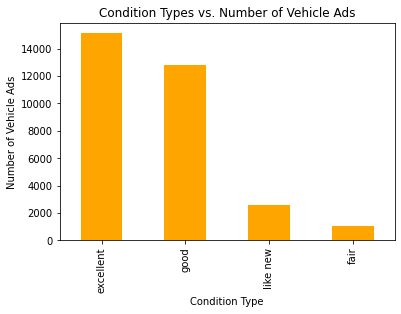

In [29]:
data_filtered["condition"].value_counts().plot(kind="bar", color="orange")
plt.title("Condition Types vs. Number of Vehicle Ads")
plt.xlabel("Condition Type")
plt.ylabel("Number of Vehicle Ads")

* The bar chart displaying the conditions in this filtered dataset is more useful than the chart in the unfiltered dataset because it focuses on the conditions that are most prevelant in the dataset. The conditions "new" and "salvage" have been removed, as they appeared to be outliers. In this dataset, most vehicles fell into the above four categories.

## Ads lifetime


39.695039048913905
count    31627.000000
mean        39.695039
std         28.319722
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64
Upper & Lower Bound: [-32.0, 104.0]


,count,mean
,price,price
days_listed,,
101,51,9424.392157
102,42,11300.904762
103,51,11335.156863
104,58,10773.758621
105,49,11096.102041
...,...,...
244,1,5995.000000
252,1,11500.000000


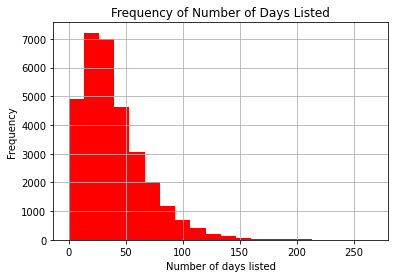

In [30]:
data_filtered["days_listed"].hist(bins=20, color="red")
plt.xlabel("Number of days listed")
plt.ylabel("Frequency")
plt.title("Frequency of Number of Days Listed")
print(data_filtered["days_listed"].mean())
data_filtered["days_listed"].median()
print(data_filtered["days_listed"].describe())
short_listings = data_filtered.query('days_listed == 0')
long_listings = data_filtered.query('days_listed > 100')
Q1e = data_filtered['days_listed'].quantile(0.25)
Q3e = data_filtered['days_listed'].quantile(0.75)
iqr6 = Q3e-Q1e
print("Upper & Lower Bound:",[Q1e-(1.5 * iqr6), Q3e+(1.5 * iqr6)])
short_listings.pivot_table(index="days_listed", values="price", aggfunc="mean")
long_listings.pivot_table(index="days_listed", values="price", aggfunc=["count","mean"])

## Average price per each type of vehicle

Text(0.5, 1.0, 'Average Price per Type of Vehicle')

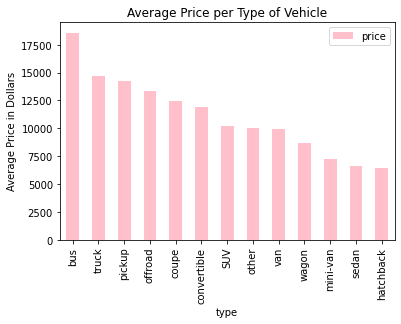

In [31]:
data_filtered.pivot_table(index="type", values="price", aggfunc="mean").sort_values(by="price", ascending=False).plot(kind="bar", color="pink")
plt.ylabel("Average Price in Dollars")
plt.title("Average Price per Type of Vehicle")


Text(0.5, 1.0, 'Number of Ads per Type of Vehicle')

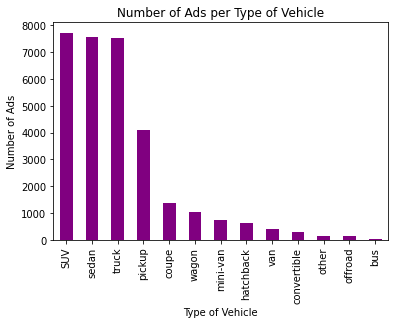

In [32]:
data_filtered["type"].value_counts().sort_values(ascending=False).plot(kind="bar", color="purple")
plt.xlabel("Type of Vehicle")
plt.ylabel("Number of Ads")
plt.title("Number of Ads per Type of Vehicle")

* SUV and Sedan type vehicles have the greatest number of ads. However, buses and trucks and pickups are the top three highest priced vehicles. While buses are the highest priced, there are not a lot of ads for this type of vehicle. I will select trucks and pickups to analyze, as they have sufficient number of ads and are on the higher end in terms of price.

## Price factors

In [33]:
data_filtered.groupby(['type']).agg(['count', 'mean', 'median', 'std']).reset_index().sort_values(by='type', ascending=False)


type price                                      model_year  \
                count          mean   median           std      count   
12        wagon  1019   8659.842983   6995.0   5330.111923       1019   
11          van   390   9930.794872   7572.5   8774.917486        390   
10        truck  7519  14722.203219  13950.0   8668.775892       7519   
9         sedan  7575   6578.542310   5900.0   3826.599237       7575   
8        pickup  4091  14249.503300  12850.0   9108.885508       4091   
7         other   153  10004.320261   8795.0   7374.213496        153   
6       offroad   143  13334.944056  11450.0   8501.345973        143   
5      mini-van   724   7265.324586   5995.0   4933.486514        724   
4     hatchback   621   6407.442834   5795.0   3605.310667        621   
3         coupe  1369  12423.834186  10000.0   8930.944445       1369   
2   convertible   277  11954.194946  10995.0   7297.232456        277   
1           bus    17  18575.823529  28990.0  11454.846836         17   
0           SUV  7729  10186.178548   8450.0   7046.364292       7729   

                                  cylinders  ... age_in_years            \
           mean  median       std     count  ...       median       std   
12  2009.422964  2010.0  4.389519      1019  ...          8.0  4.397868   
11  2009.341026  2010.0  4.821131       390  ...          8.0  4.840816   
10  2008.758213  2010.0  5.521542      7519  ...          9.0  5.511377   
9   2010.231023  2011.0  4.467553      7575  ...          7.0  4.463797   
8   2008.373747  2009.0  6.063711      4091  ...          9.0  6.054599   
7   2007.496732  2008.0  6.969977       153  ...         10.0  6.980001   
6   2005.174825  2006.0  7.087297       143  ...         13.0  7.118670   
5   2009.211326  2009.0  4.271988       724  ...          9.0  4.274022   
4   2009.597424  2010.0  5.254699       621  ...          8.0  5.235818   
3   2008.978817  2011.0  7.208587      1369  ...          7.0  7.191242   
2   2004.036101  2004.0  8.373015       277  ...         14.0  8.361715   
1   2008.823529  2011.0  4.260799        17  ...          8.0  4.182421   
0   2009.143097  2010.0  5.076023      7729  ...          8.0  5.080597   

   avg_mileage                                           new_condition  \
         count          mean        median           std         count   
12        1019  16202.452937  14735.600000   7622.252900          1019   
11         390  16728.613128  15203.669935   8005.605827           390   
10        7519  16601.602535  14800.000000   9054.196075          7519   
9         7575  16444.246721  14943.666670   8263.188057          7575   
8         4091  15912.505420  14432.345380   8601.489061          4091   
7          153  14872.818544  13050.750000   9233.901489           153   
6          143  11874.282325   9296.296300   7721.526795           143   
5          724  16763.546499  15104.166665   7561.772182           724   
4          621  15918.389499  14908.800000   8063.298141           621   
3         1369  12976.143219  11000.000000   8967.533158          1369   
2          277   9810.510391   7413.388890   8276.921516           277   
1           17  11186.488069   5939.125000  10886.835549            17   
0         7729  16151.628519  14500.000000   8029.490274          7729   

                               
        mean median       std  
12  2.548577      3  0.612850  
11  2.489744      2  0.656114  
10  2.536109      3  0.678984  
9   2.666667      3  0.684944  
8   2.549254      3  0.703958  
7   2.431373      2  0.636238  
6   2.741259      3  0.784653  
5   2.618785      3  0.694560  
4   2.692432      3  0.688915  
3   2.541271      2  0.712215  
2   2.703971      3  0.701256  
1   2.176471      2  0.392953  
0   2.663734      3  0.671538  

[13 rows x 49 columns]

                         price  model_year  cylinders  odometer  days_listed  \
price                 1.000000    0.639875   0.015171 -0.443910     0.014390   
model_year            0.639875    1.000000  -0.021671 -0.464116    -0.003253   
cylinders             0.015171   -0.021671   1.000000  0.002141     0.005700   
odometer             -0.443910   -0.464116   0.002141  1.000000     0.008235   
days_listed           0.014390   -0.003253   0.005700  0.008235     1.000000   
day_of_week_posted   -0.000943   -0.005185  -0.011223 -0.000218     0.003992   
year_posted           0.034799    0.064045   0.009234 -0.017824    -0.000065   
month_posted         -0.030026   -0.051387  -0.000195  0.016815    -0.006220   
vehicle_age_in_years -0.638105   -0.996415   0.022493  0.463461     0.003253   
age_in_years         -0.638105   -0.996415   0.022493  0.463461     0.003253   
avg_mileage           0.332731    0.605505  -0.033999  0.198562     0.007826   
new_condition         0.309494    0.3218

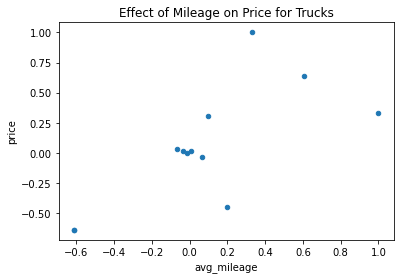

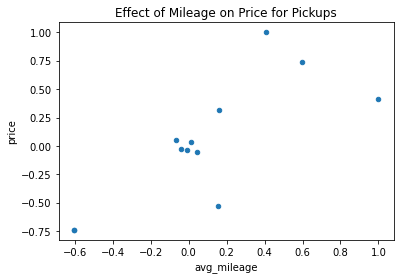

In [34]:
truck_data = data_filtered.query('type=="truck"')
pickup_data = data_filtered.query('type=="pickup"')
print(truck_data.corr())
print()
print(pickup_data.corr())
print(data_filtered.corr())
print("Truck Price & Vehicle Age Correlation:")
print(truck_data[["price", "vehicle_age_in_years"]].corr())
print("Truck Price & Vehicle Mileage Correlation:")
print(truck_data[["price", "avg_mileage"]].corr())
print()
print("Pickup Price & Vehicle Mileage Correlation:")
print(pickup_data[["price", "avg_mileage"]].corr())
print("Pickup Price & Vehicle Mileage Correlation:")
print(pickup_data[["price", "vehicle_age_in_years"]].corr())

truck_data.corr().plot(kind="scatter", x="avg_mileage", y="price")
plt.title("Effect of Mileage on Price for Trucks")
plt.show()
print()
pickup_data.corr().plot(kind="scatter", x="avg_mileage", y="price")
plt.title("Effect of Mileage on Price for Pickups")
plt.show()

print()


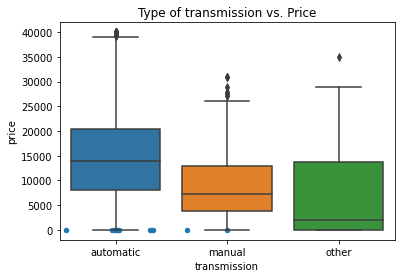

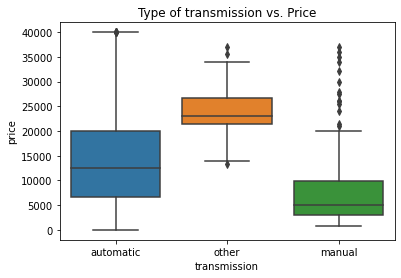

Text(0.5, 1.0, 'Type of transmission vs. Price')

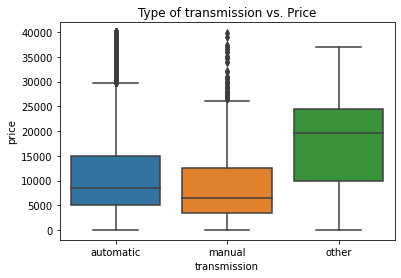

In [35]:
truck_data.corr().plot(kind="scatter", x="price", y="new_condition")
sb.boxplot( x = 'transmission', y = 'price', data = truck_data )
plt.title("Type of transmission vs. Price")
plt.show()
sb.boxplot( x = 'transmission', y = 'price', data = pickup_data )
plt.title("Type of transmission vs. Price")
plt.show()
sb.boxplot(  x = 'transmission', y = 'price', data = data_filtered)
plt.title("Type of transmission vs. Price")

* Transmission does not seem to have a definite effect on price, as it also appears that the mediating factor between the two variables here might depend on the type of vehicle. As shown above, trucks tend to be higher priced if they are automatic while pickups appear to be more expensive if they fall in the "other" transmission category.

AxesSubplot(0.125,0.125;0.775x0.755)


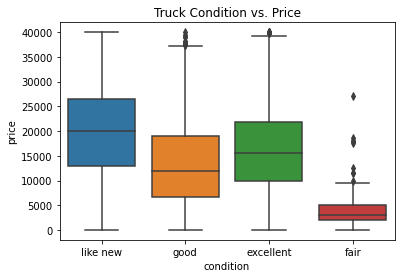

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Pickup Condition vs. Price')

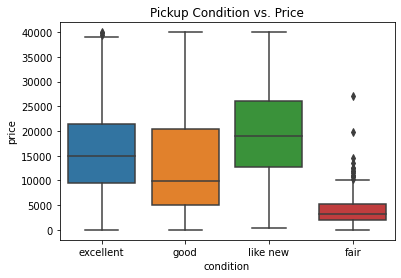

In [36]:
print(sb.boxplot( x= 'condition', y="price", data= truck_data))
plt.title("Truck Condition vs. Price")
plt.show()
print(sb.boxplot( x= 'condition', y="price", data= pickup_data))
plt.title("Pickup Condition vs. Price")

* Higher priced vehicles tend to also have a be in better condition, which makes sense. Trucks and pickups in the "like new" category of condition tend to be higher priced.

AxesSubplot(0.125,0.125;0.775x0.755)


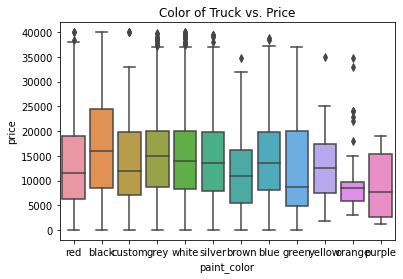

AxesSubplot(0.125,0.125;0.775x0.755)


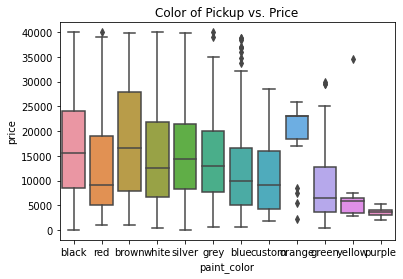

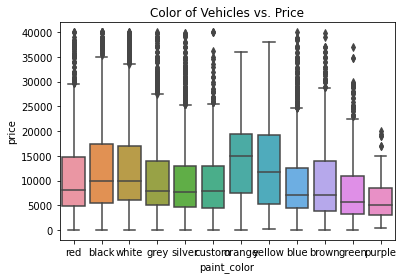

In [37]:
print(sb.boxplot( x= 'paint_color', y="price", data= truck_data))
plt.title("Color of Truck vs. Price")
plt.show()
print(sb.boxplot( x= 'paint_color', y="price", data= pickup_data))
plt.title("Color of Pickup vs. Price")
plt.show()
sb.boxplot( x= 'paint_color', y="price", data= data_filtered)
plt.title("Color of Vehicles vs. Price")
plt.show()

* Based on the filtered dataset, it appears that the colors do vary in price, but the type of vehicle also factors in here. For instance, we find that trucks tend to be higher priced in the color black, while pickups tend to be higher priced in the color brown.

## General conclusion


* This dataset contained a considerable amount of missing values, which were distributed accross 5 different columns. Missing values found in the ["is_4wd"] column and ["odometer"] column were filled in while all other missing values were removed from the dataset. I justified filling in the missing values in the above named columns as the ["is_4wd"] column contained only one type of boolean value "False", so it is reasonable to assume that the missing values were likely due to not entering the "True" boolean value. 
* Furthermore, the missing values found in the ["odometer"] column were replaced with the median, as that seemed to be the best fit value in this circumstance. Missing values in the ["paint_color"], ["model_year"] and ["cylinder"] columns were removed, as the likely possibility for incorrectly filling in those values might have had an affect on the final analysis of finding out which factors contribute most to price. There were no duplicates in this dataset. It is important to note that when the additional column "avg_mileage" was created as result of dividing ["odometer"] and ["model_year"], it created problematic infinite values, as there some vehicles who were 0 years old but also had a non-zero value for their respective ["odometer"] reading. These values were problematic because they did not allow for further analysis/plotting of the data. Thus, I went back and replaced all values in the ["vehicle_age_in_years"] column that were equal to "0" with "1" under the condition that those values also had an ["odometer"] values greater than 0.
* I chose to replace these values with 1, as an ['odometer'] reading that is greater than 0 indicates usage, which indicates an age that should be greater than 0 as well.
"

# Conclusion
* Upon analyzing the different factors that impact vehicle price, I concluded that the two factors that appear to have the most direct impact on price are the vehicles age in years along with mileage. I selected the top two most popular and highest-priced vehicles which were trucks and pickups and analyzed data based on these two types of vehicles. The most significant finding was that a medium-strength negative correlation exists (-.638, -.740) between vehicle age and price for trucks and pickups respectively. This suggests that the younger the car, the higher the price, which is not surprising. 
* A correlational analysis of price and mileage resulted in a weak positive correlation (.332, .410) for trucks and pickups respectively. This indicates that mileage did not necessarily impact the price of vehicles in this dataset. As stated earlier, it is noteable that the sample of vehicles in this dataset was overall skewed to the left in terms of price and it is possible that a larger and more representative sample of vehicles might provide more insight into the true relationship between mileage and price.
* Furthermore, paint color and transmission did not seem to have a direct impact on price either, as both appeared to be mediated by some other variable, such as type of vehicle. Further investigation should be conducted in order to determine if there are other confounding variables that mediate the relationship between these factors and price. However, vehicle condition did appear to impact price, as vehicles with the "like new" condition tended to be higher priced as well. This makes sense, as one would expect vehicles in better condition to be priced higher. Another point to make is that in my analysis I compared pickups and trucks in seperate dataframes to compare how these higher-priced vehicles are impacted by other factors.While these findings give insight to some of the factors that might impact vehicle price, further analysis should be conducted in order to confirm these findings and what they suggest. Although the results with in this analysis, a deeper look into the relationship between mileage and price should be taken, as this analysis can serve as a preliminary step to further investigation.
